In [81]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [9]:
filename = '440c020a.wav'

y, sr = librosa.load(filename, mono=False)

In [10]:
y.shape

(4, 190985)

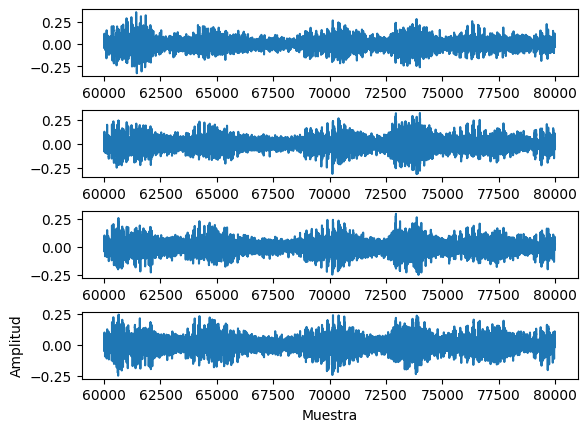

In [11]:
x_inf, x_sup = 60000, 80000
x = np.arange(x_inf, x_sup, 1)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
plt.ylabel('Amplitud')
plt.xlabel('Muestra')
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.plot(x, y[0,x_inf:x_sup])
#ax1.set_xlim(0, 5)
#ax1.set_xlabel('Time')
#ax1.set_ylabel('s1 and s2')
#ax1.grid(True)

ax2.plot(x, y[1,x_inf:x_sup])
#ax2.set_ylabel('CSD (dB)')

ax3.plot(x, y[2,x_inf:x_sup])
ax4.plot(x, y[3,x_inf:x_sup])

plt.show()

In [50]:
def add_floor(channel, n_samples, initial=True):
    aditional_samples = np.zeros(n_samples)
    result = np.append(aditional_samples, channel) if initial else np.append(channel, aditional_samples)
    return result

In [51]:
ch1 = np.random.random(15)
delayed = add_floor(ch1, 10)
final_delayed = add_floor(ch1, 10, initial=False)
print(delayed.shape, delayed)
print(delayed.shape, final_delayed)

(25,) [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.34396325 0.72960737
 0.02400858 0.47926831 0.25099996 0.37662063 0.32199427 0.26192882
 0.43988596 0.20267777 0.37114945 0.70832399 0.19826782 0.39604906
 0.6682991 ]
(25,) [0.34396325 0.72960737 0.02400858 0.47926831 0.25099996 0.37662063
 0.32199427 0.26192882 0.43988596 0.20267777 0.37114945 0.70832399
 0.19826782 0.39604906 0.6682991  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


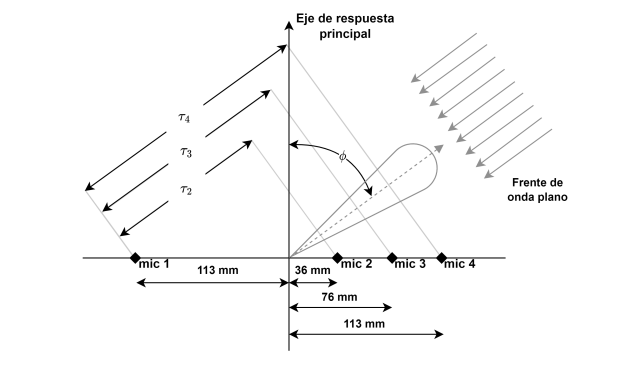

In [14]:
def calculate_time_shift(angle, distance, speed=343):
    return distance * np.sin(angle * np.pi / 180) / speed

In [35]:
print(f'Primer desfase: {round(calculate_time_shift(45, (113 + 36)*10**-3)*sr)} (muestras)')
print(f'Segundo desfase: {round(calculate_time_shift(45, (113 + 76)*10**-3)*sr)} (muestras)')
print(f'Tercer desfase: {round(calculate_time_shift(45, (113 + 113)*10**-3)*sr)} (muestras)')

Primer desfase: 7 (muestras)
Segundo desfase: 9 (muestras)
Tercer desfase: 10 (muestras)


In [92]:
def delay_and_sum(channels, angle, distances, sr, speed=343):
    # In the meantime only works with 4 channels (kinect)
    delays = [round(sr * calculate_time_shift(angle, distance, speed)) for distance in distances]
    
    y_1 = add_floor(channels[0,:], delays[2], initial=False)
    y_2 = add_floor(add_floor(channels[1,:], delays[0]), delays[2] - delays[0], initial=False)
    y_3 = add_floor(add_floor(channels[2,:], delays[1]), delays[2] - delays[1], initial=False)
    y_4 = add_floor(channels[3,:], delays[2])

    delayed_audios =  np.array([y_1, y_2, y_3, y_4])
    
    return delayed_audios

In [93]:
result = delay_and_sum(y, 45, [(113 + 36)*10**-3, (113 + 76)*10**-3, (113 + 113)*10**-3], sr)
result.shape


(4, 190995)

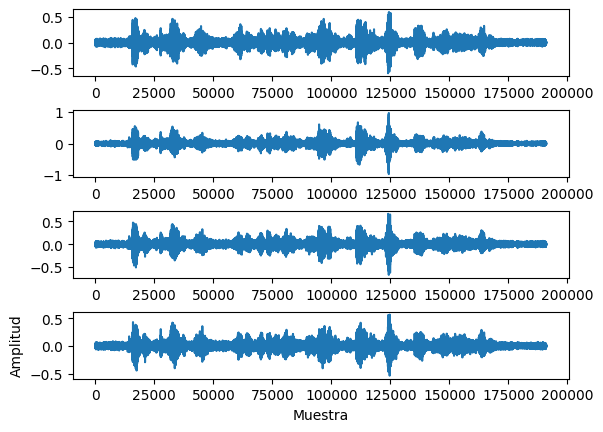

In [79]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
plt.ylabel('Amplitud')
plt.xlabel('Muestra')
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.plot(result[0,:])
ax2.plot(result[1,:])
ax3.plot(result[2,:])
ax4.plot(result[3,:])

plt.show()

In [91]:
sf.write('stereo_file.wav', np.random.randn(1000, 2), 44100, 'PCM_24')

In [99]:
sf.write('result.wav', result.sum(axis=0), sr, 'PCM_24')